In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

## Load the "MNIST Handwritten digits" dataset:

In [2]:
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


## Prepare the training images:

In [3]:
def normalize_img(image, label):
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

## Prepare the testing images:

In [4]:
ds_test = ds_test.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

## Create and train the model:

In [19]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10)
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

model.fit(
    ds_train,
    epochs=6,
    validation_data=ds_test,
)

Epoch 1/6
469/469 [==============================] - 4s 6ms/step - loss: 0.3328 - sparse_categorical_accuracy: 0.9069 - val_loss: 0.1689 - val_sparse_categorical_accuracy: 0.9492
Epoch 2/6
469/469 [==============================] - 3s 6ms/step - loss: 0.1356 - sparse_categorical_accuracy: 0.9599 - val_loss: 0.1171 - val_sparse_categorical_accuracy: 0.9638
Epoch 3/6
469/469 [==============================] - 3s 7ms/step - loss: 0.0937 - sparse_categorical_accuracy: 0.9721 - val_loss: 0.1007 - val_sparse_categorical_accuracy: 0.9685
Epoch 4/6
469/469 [==============================] - 3s 6ms/step - loss: 0.0719 - sparse_categorical_accuracy: 0.9784 - val_loss: 0.0827 - val_sparse_categorical_accuracy: 0.9736
Epoch 5/6
469/469 [==============================] - 3s 6ms/step - loss: 0.0571 - sparse_categorical_accuracy: 0.9829 - val_loss: 0.0949 - val_sparse_categorical_accuracy: 0.9708
Epoch 6/6
469/469 [==============================] - 3s 6ms/step - loss: 0.0463 - sparse_categorical_accu

## Visualize the model's structure:

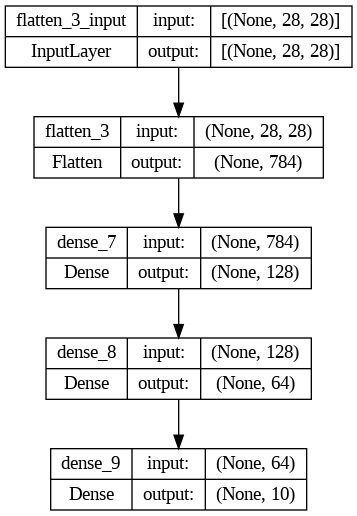

In [20]:
tf.keras.utils.plot_model(model, show_shapes=True)

## Visualize the model's results:

4/4 [==============================] - 0s 4ms/step


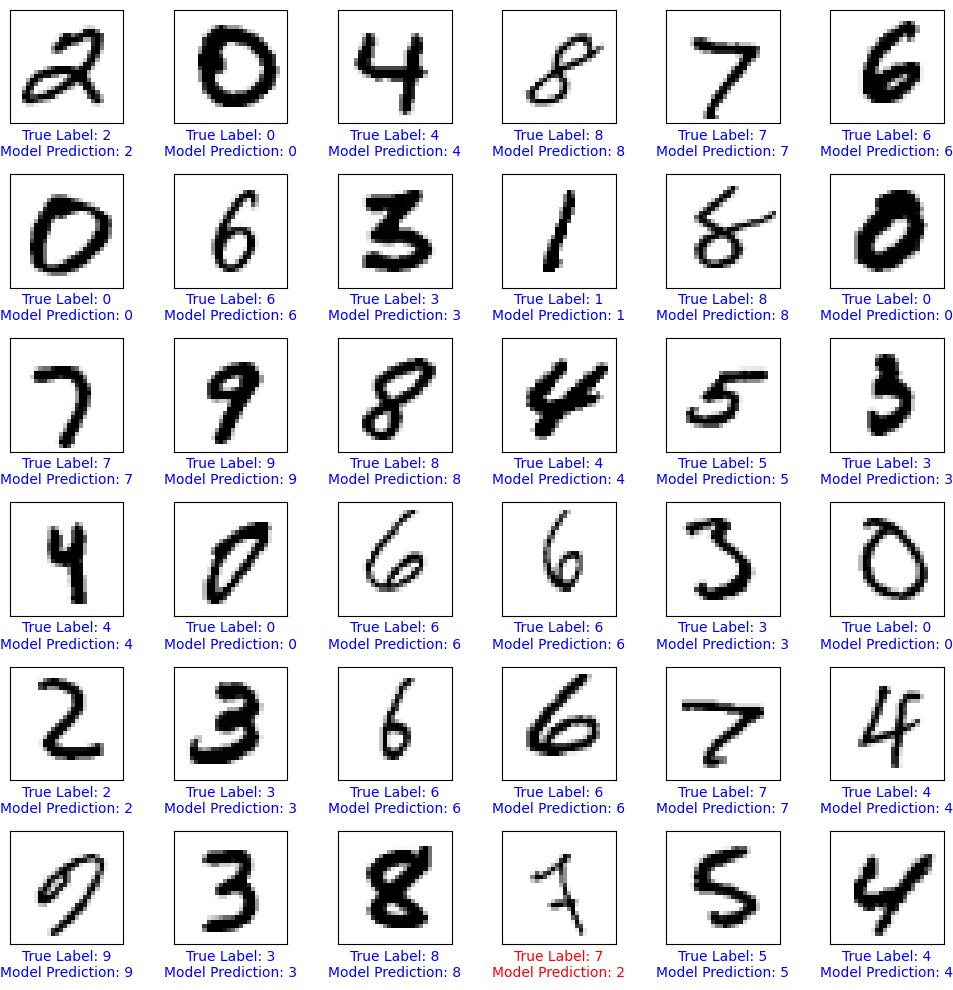

In [21]:
def plot_test_results(model, ds_test):
    test_images, test_labels = next(iter(ds_test))
    test_images, test_labels = test_images.numpy(), test_labels.numpy()

    predictions = model.predict(test_images)
    predicted_labels = np.argmax(predictions, axis=1)

    plt.figure(figsize=(10, 10))
    for i in range(36):
        plt.subplot(6, 6, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(test_images[i], cmap=plt.cm.binary)
        true_label = test_labels[i]
        predicted_label = predicted_labels[i]
        color = 'blue' if predicted_label == true_label else 'red'
        plt.xlabel(f"True Label: {true_label}\nModel Prediction: {predicted_label}", color=color)
    plt.tight_layout()
    plt.show()

plot_test_results(model, ds_test)